# House Rent Predection (India)

- This nodebook demonstrates how to build ML model to pridict rent of house based on many factors 
- This is real world dataset (2024)

## Import Libraries 


In [72]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Dataset 


In [73]:
df=pd.read_csv("data.csv")

In [74]:
df.head()


,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0


In [75]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7691 non-null   object 
 1   locality    7691 non-null   object 
 2   city        7691 non-null   object 
 3   area        7691 non-null   float64
 4   beds        7691 non-null   int64  
 5   bathrooms   7691 non-null   int64  
 6   balconies   7691 non-null   int64  
 7   furnishing  7691 non-null   object 
 8   area_rate   7691 non-null   float64
 9   rent        7691 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 601.0+ KB


,area,beds,bathrooms,balconies,area_rate,rent
count,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,7.691000e+03
mean,1106.354180,2.208685,2.137043,0.817319,47.619989,5.479508e+04
std,1197.426843,0.993481,1.027677,1.243361,68.989657,9.742006e+04
min,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000e+03
25%,600.000000,1.000000,1.000000,0.000000,21.000000,1.500000e+04
50%,900.000000,2.000000,2.000000,0.000000,31.000000,2.800000e+04
75%,1300.000000,3.000000,3.000000,2.000000,54.000000,5.700000e+04
max,70000.000000,10.000000,10.000000,10.000000,2586.000000,2.700000e+06


## Data Cleaning
### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset
* Removing Outliers

In [76]:
# Drop Unwanted Column 
df.drop(["area_rate","house_type"], axis=1, inplace=True)

In [77]:
# Check Missing Values
df.isnull().sum()

locality      0
city          0
area          0
beds          0
bathrooms     0
balconies     0
furnishing    0
rent          0
dtype: int64

In [78]:
df["city"].unique()

array(['Mumbai', 'Pune', 'Nagpur', 'Bangalore', 'New Delhi'], dtype=object)

In [79]:
df["locality"].unique()

array(['Goregaon East', 'Powai', 'Mundhwa', ..., 'Anjanapura Township',
       'Qutub Vihar Phase 2', 'Govindpura'], shape=(1984,), dtype=object)

In [80]:
df["locality"].value_counts()

locality
Hadapsar               106
Kharadi                 98
Wagholi                 94
Whitefield              88
Andheri West            78
                      ... 
Khichripur               1
Ambewadi Malad East      1
Anjanapura Township      1
Samaspur Village         1
Shri Krishna Nagar       1
Name: count, Length: 1984, dtype: int64

In [81]:
df["furnishing"].unique()

array(['Semi-Furnished', 'Unfurnished', 'Furnished'], dtype=object)

In [82]:
furnishing_map = {'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 2}
df['furnishing_score'] = df['furnishing'].map(furnishing_map)
df.drop('furnishing', axis=1, inplace=True)

In [83]:
df.isnull().sum()

locality            0
city                0
area                0
beds                0
bathrooms           0
balconies           0
rent                0
furnishing_score    0
dtype: int64

In [84]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 6
Num of Categorical Features : 2
Num of Discrete Features : 4
Num of Continuous Features : 2


In [85]:
# Independent and Dependent Features 
from sklearn.model_selection import train_test_split
X = df.drop(['rent'], axis=1)
y = df['rent']

In [86]:
X.head()

,locality,city,area,beds,bathrooms,balconies,furnishing_score
0,Goregaon East,Mumbai,897.0,2,2,0,1
1,Powai,Mumbai,490.0,1,1,0,1
2,Mundhwa,Pune,550.0,1,1,0,0
3,Hingna,Nagpur,1000.0,2,2,0,0
4,Mira Road,Mumbai,595.0,1,1,0,0


In [87]:
y.head()

0    120000.0
1     40000.0
2     12000.0
3      8000.0
4     15000.0
Name: rent, dtype: float64

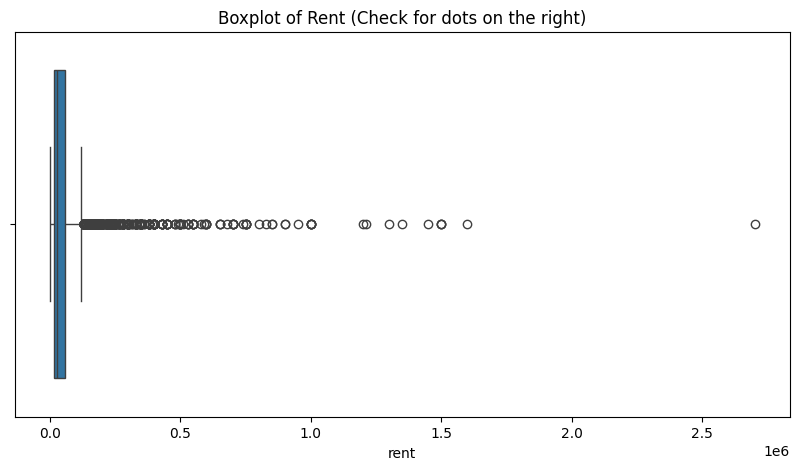

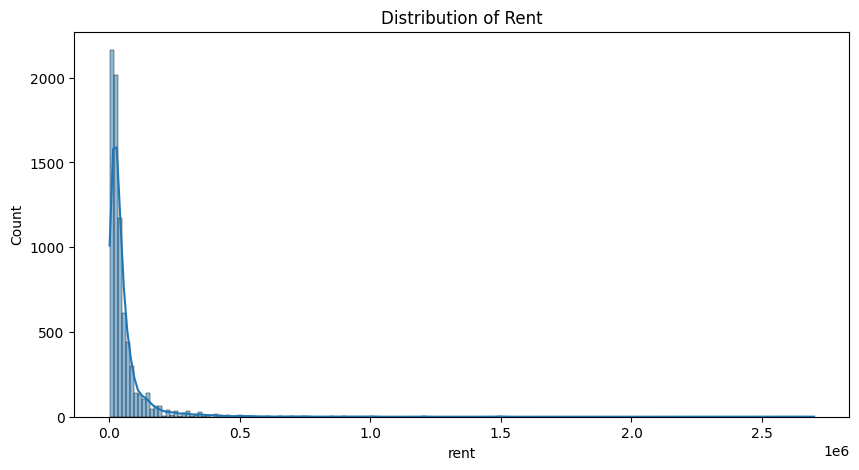

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Visualize the Target Variable (Rent/Price)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['rent'])
plt.title("Boxplot of Rent (Check for dots on the right)")
plt.show()

# 2. Check the Distribution (Is it a long tail?)
plt.figure(figsize=(10, 5))
sns.histplot(df['rent'], kde=True)
plt.title("Distribution of Rent")
plt.show()

In [89]:
# Removing Outliers from 'rent' Column
# Step 1: Define thresholds (e.g., 1st and 99th percentile)
min_threshold = df['rent'].quantile(0.01)
max_threshold = df['rent'].quantile(0.99)

print(f"Removing houses cheaper than: {min_threshold}")
print(f"Removing houses expensive than: {max_threshold}")

# Step 2: Filter the dataframe
df_clean = df[(df['rent'] > min_threshold) & (df['rent'] < max_threshold)]

# Check how much data remains
print(f"Old Shape: {df.shape}")
print(f"New Shape: {df_clean.shape}")

Removing houses cheaper than: 4780.000000000001
Removing houses expensive than: 430000.0
Old Shape: (7691, 8)
New Shape: (7532, 8)


In [90]:
X.head()

,locality,city,area,beds,bathrooms,balconies,furnishing_score
0,Goregaon East,Mumbai,897.0,2,2,0,1
1,Powai,Mumbai,490.0,1,1,0,1
2,Mundhwa,Pune,550.0,1,1,0,0
3,Hingna,Nagpur,1000.0,2,2,0,0
4,Mira Road,Mumbai,595.0,1,1,0,0


## Feature Encoding and Scaling
**One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [91]:
len(df['city'].unique())

5

In [92]:
df['city'].value_counts()

city
New Delhi    1808
Bangalore    1790
Pune         1779
Mumbai       1719
Nagpur        595
Name: count, dtype: int64

In [93]:
# One hot encoding for 'city' column
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
city_encoded = ohe.fit_transform(X[["city"]]).toarray()
X_city_encoded = pd.DataFrame(city_encoded, columns=ohe.get_feature_names_out(['city']))
X = pd.concat([X.drop('city', axis=1), X_city_encoded], axis=1)

In [94]:
X.head()

,locality,area,beds,bathrooms,balconies,furnishing_score,city_Bangalore,city_Mumbai,city_Nagpur,city_New Delhi,city_Pune
0,Goregaon East,897.0,2,2,0,1,0.0,1.0,0.0,0.0,0.0
1,Powai,490.0,1,1,0,1,0.0,1.0,0.0,0.0,0.0
2,Mundhwa,550.0,1,1,0,0,0.0,0.0,0.0,0.0,1.0
3,Hingna,1000.0,2,2,0,0,0.0,0.0,1.0,0.0,0.0
4,Mira Road,595.0,1,1,0,0,0.0,1.0,0.0,0.0,0.0


In [95]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((5768, 11), (1923, 11))

In [96]:
# --- TARGET ENCODING LOGIC STARTS HERE ---

# 4. Calculate Average Rent per Locality using only Training Data
# We create a dictionary: {'Bandra': 80000, 'Virar': 12000, ...}
locality_means = X_train.join(y_train).groupby('locality')['rent'].mean()

# 5. Map these averages to the Training Set
X_train['locality_encoded'] = X_train['locality'].map(locality_means)

# 6. Map these averages to the Test Set
X_test['locality_encoded'] = X_test['locality'].map(locality_means)

# 7. Handle "New" Localities in Test Data
# If the Test set has a locality that wasn't in Train, it will get NaN.
# Fill these NaNs with the global average rent of the training set.
global_mean = y_train.mean()
X_test['locality_encoded'].fillna(global_mean, inplace=True)

# 8. Drop the original text column
X_train.drop('locality', axis=1, inplace=True)
X_test.drop('locality', axis=1, inplace=True)

# Now X_train and X_test are ready for your model!
print(X_train[['locality_encoded']].head())

      locality_encoded
4322      60000.000000
926       18000.000000
3929      10375.000000
5176      39333.333333
2306      23672.727273


In [97]:
X_train.head()

,area,beds,bathrooms,balconies,furnishing_score,city_Bangalore,city_Mumbai,city_Nagpur,city_New Delhi,city_Pune,locality_encoded
4322,2800.0,2,2,0,0,0.0,0.0,0.0,1.0,0.0,60000.000000
926,800.0,1,1,0,0,1.0,0.0,0.0,0.0,0.0,18000.000000
3929,600.0,1,1,2,0,0.0,0.0,1.0,0.0,0.0,10375.000000
5176,1400.0,3,3,2,0,1.0,0.0,0.0,0.0,0.0,39333.333333
2306,1089.0,3,2,0,0,0.0,1.0,0.0,0.0,0.0,23672.727273


## Model Training And Model Selection

In [98]:
# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [99]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [100]:
## Beginning Model Training
models = {
    "Random Forest Regressor": RandomForestRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 19375.8489
- Mean Absolute Error: 6064.4752
- R2 Score: 0.9634
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45471.9545
- Mean Absolute Error: 18682.4602
- R2 Score: 0.7129




## Hyperparameter 

In [101]:
# Top 3 Models are Random Forest Regressor, Xgboost Regressor, Graident BoostRegressor
#Initialize few parameter for Hyperparamter tuning

rf_params = {
    "max_depth": [5, 10, 15, 20], 
    "max_features": [0.5, 0.7, 1.0, 'sqrt'], # Uses fractions for speed
    "min_samples_split": [2, 10, 20],
    "n_estimators": [50, 100, 200] # Cap at 200 for tuning
}

In [102]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestRegressor(), rf_params)
]

In [103]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    print(f"Training {name}...")
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=20,  # <--- REDUCED FROM 100
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Training RF...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
---------------- Best Params for RF -------------------
{'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 15}


In [109]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=50, min_samples_split=2, max_features='sqrt', max_depth=15, 
                                                     n_jobs=-1),
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 19011.3033
- Mean Absolute Error: 7550.8415
- R2 Score: 0.9647
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 42527.4822
- Mean Absolute Error: 17711.3726
- R2 Score: 0.7489




In [105]:
# Predict on basis of input features innotebook itself 
def predict_rent(input_data, model):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # One-hot encode 'city'
    city_encoded = ohe.transform(input_df[["city"]]).toarray()
    city_df = pd.DataFrame(city_encoded, columns=ohe.get_feature_names_out(['city']))
    input_df = pd.concat([input_df.drop('city', axis=1), city_df], axis=1)
    
    # Target encode 'locality'
    input_df['locality_encoded'] = input_df['locality'].map(locality_means)
    input_df['locality_encoded'].fillna(global_mean, inplace=True)
    input_df.drop('locality', axis=1, inplace=True)
    
    # Predict rent
    predicted_rent = model.predict(input_df)
    return predicted_rent[0]


In [106]:
df["locality"].value_counts()

locality
Hadapsar               106
Kharadi                 98
Wagholi                 94
Whitefield              88
Andheri West            78
                      ... 
Khichripur               1
Ambewadi Malad East      1
Anjanapura Township      1
Samaspur Village         1
Shri Krishna Nagar       1
Name: count, Length: 1984, dtype: int64

In [107]:
# Enter your input features here
input_features = {
    "locality": "Pimpri Chinchwad",
    "city": "Pune",
    "area": 1000,
    "beds": 2,
    "bathrooms": 2,
    "balconies": 1,
    "furnishing_score": 1
}

predicted_rent = predict_rent(input_features, models["Random Forest Regressor"])
print(f"Predicted Rent: {predicted_rent}")

Predicted Rent: 18991.61972283206


#### -----------------------X-----------------------------------x

In [108]:
import pickle

# 1. Select your best model (e.g., Random Forest)
# Make sure you use the variable name of your final trained model
best_model = models["Random Forest Regressor"]

# 2. Get the columns list (Crucial to ensure order matches)
# We need to know exactly which columns the model expects
# (assuming X_train was your final training data dataframe)
model_columns = X_train.columns.tolist()

# 3. Save everything to files
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('ohe.pkl', 'wb') as f:
    pickle.dump(ohe, f)  # The OneHotEncoder for City

with open('locality_means.pkl', 'wb') as f:
    pickle.dump(locality_means, f) # The dictionary for Locality Target Encoding

with open('global_mean.pkl', 'wb') as f:
    pickle.dump(global_mean, f) # The fallback value for unknown localities

with open('columns.pkl', 'wb') as f:
    pickle.dump(model_columns, f)

print("All artifacts saved successfully!")

All artifacts saved successfully!
